In [102]:
import pandas as pd
import numpy as np
import seaborn as snd
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
import math
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
ast_data=pd.read_csv(r"C:\Users\User\Desktop\358\allstar_team_talent.csv")

In [3]:
ast_data.head()

,yearID,gameNum,gameID,lgID,tm_OFF_talent,tm_DEF_talent,tm_PIT_talent,MLB_avg_RPG,talent_RSPG,talent_RAPG,unadj_PYTH,timeline_adj,SOS,adj_PYTH,no_1_player,no_2_player
0,1966,0,NLS196607120,NL,1.332265,0.130991,0.720508,3.99,5.322265,3.138501,0.724426,0.860664,0.430332,0.665082,mayswi01,santoro01
1,1986,0,NLS198607150,AL,1.049056,0.356240,0.677431,4.41,5.459056,3.376329,0.706675,0.917536,0.458768,0.671282,higuete01,clemero02
2,1934,0,NLS193407100,AL,1.778661,0.116654,0.627669,4.91,6.688661,4.165678,0.704031,0.769668,0.384834,0.598084,hardeme01,foxxji01
3,1941,0,ALS194107080,AL,1.472107,0.090803,0.616915,4.49,5.962107,3.782282,0.696952,0.789573,0.394787,0.600030,dimagjo01,willite01
4,1940,0,NLS194007090,AL,1.356557,0.138973,0.673328,4.68,6.036557,3.867698,0.693104,0.786730,0.393365,0.594230,dimagjo01,newsobo01


In [4]:
ast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 16 columns):
yearID           172 non-null int64
gameNum          172 non-null int64
gameID           172 non-null object
lgID             172 non-null object
tm_OFF_talent    172 non-null float64
tm_DEF_talent    172 non-null float64
tm_PIT_talent    172 non-null float64
MLB_avg_RPG      172 non-null float64
talent_RSPG      172 non-null float64
talent_RAPG      172 non-null float64
unadj_PYTH       172 non-null float64
timeline_adj     172 non-null float64
SOS              172 non-null float64
adj_PYTH         172 non-null float64
no_1_player      172 non-null object
no_2_player      172 non-null object
dtypes: float64(10), int64(2), object(4)
memory usage: 21.6+ KB


In [5]:
ast_data.corr()

,yearID,gameNum,tm_OFF_talent,tm_DEF_talent,tm_PIT_talent,MLB_avg_RPG,talent_RSPG,talent_RAPG,unadj_PYTH,timeline_adj,SOS,adj_PYTH
yearID,1.000000,-0.169847,-0.043519,-0.296075,0.221472,0.045944,0.012412,0.016597,0.011056,1.000000,1.000000,0.757009
gameNum,-0.169847,1.000000,-0.080079,0.212247,-0.266197,0.004787,-0.035264,0.074979,-0.151728,-0.169847,-0.169847,-0.225023
tm_OFF_talent,-0.043519,-0.080079,1.000000,-0.068034,0.329159,0.333391,0.726800,0.196214,0.722004,-0.043519,-0.043519,0.438845
tm_DEF_talent,-0.296075,0.212247,-0.068034,1.000000,-0.169342,-0.146740,-0.139827,-0.313959,0.244350,-0.296075,-0.296075,-0.061811
tm_PIT_talent,0.221472,-0.266197,0.329159,-0.169342,1.000000,0.318517,0.391334,-0.102289,0.674437,0.221472,0.221472,0.603840
MLB_avg_RPG,0.045944,0.004787,0.333391,-0.146740,0.318517,1.000000,0.889863,0.882161,-0.004970,0.045944,0.045944,0.026597
talent_RSPG,0.012412,-0.035264,0.726800,-0.139827,0.391334,0.889863,1.000000,0.737631,0.345767,0.012412,0.012412,0.231740
talent_RAPG,0.016597,0.074979,0.196214,-0.313959,-0.102289,0.882161,0.737631,1.000000,-0.375437,0.016597,0.016597,-0.236234
unadj_PYTH,0.011056,-0.151728,0.722004,0.244350,0.674437,-0.004970,0.345767,-0.375437,1.000000,0.011056,0.011056,0.661417
timeline_adj,1.000000,-0.169847,-0.043519,-0.296075,0.221472,0.045944,0.012412,0.016597,0.011056,1.000000,1.000000,0.757009


In [6]:
corre=ast_data.corr()

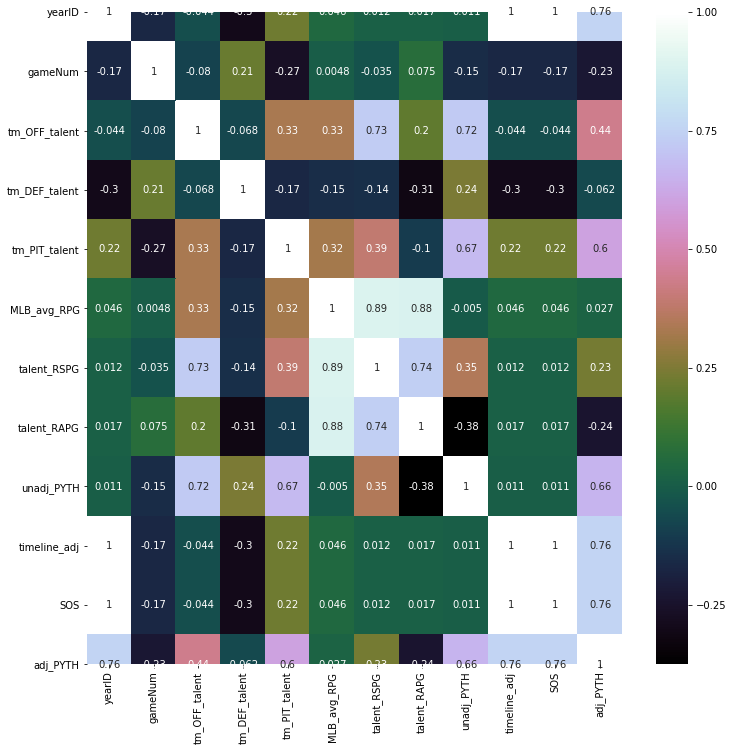

In [7]:
f, ax = plt.subplots(figsize=(12, 12))
snd.heatmap(corre,cmap="cubehelix",annot=True)

In [8]:
ast_data.isna().sum()

yearID           0
gameNum          0
gameID           0
lgID             0
tm_OFF_talent    0
tm_DEF_talent    0
tm_PIT_talent    0
MLB_avg_RPG      0
talent_RSPG      0
talent_RAPG      0
unadj_PYTH       0
timeline_adj     0
SOS              0
adj_PYTH         0
no_1_player      0
no_2_player      0
dtype: int64

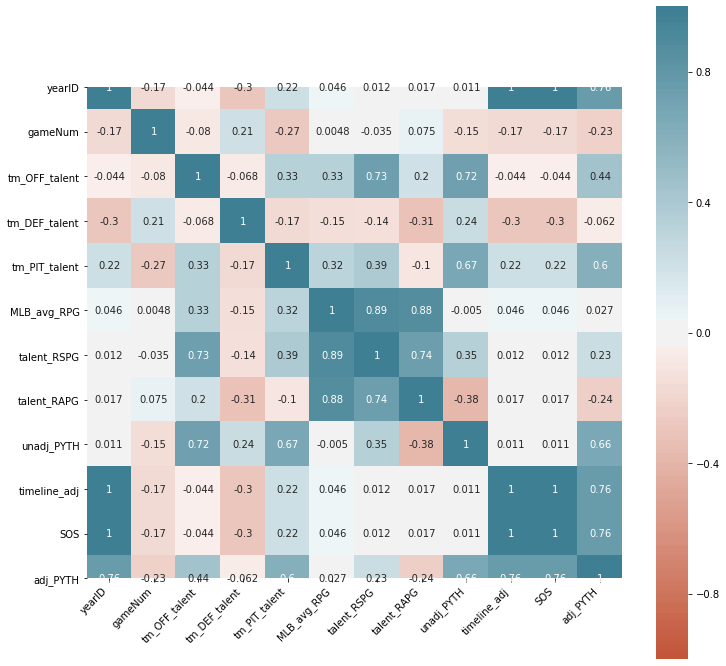

In [9]:
f, ax = plt.subplots(figsize=(12, 12))
ax = snd.heatmap(
     corre, 
    vmin=-1, vmax=1, center=0,
    cmap=snd.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
#simple regression

In [11]:
data_new =ast_data[['tm_OFF_talent','MLB_avg_RPG']]

In [12]:
data_new

,tm_OFF_talent,MLB_avg_RPG
0,1.332265,3.99
1,1.049056,4.41
2,1.778661,4.91
3,1.472107,4.49
4,1.356557,4.68
...,...,...
167,0.565687,3.91
168,0.597254,4.33
169,0.538848,4.58
170,0.628671,4.31


# Checking for outliers

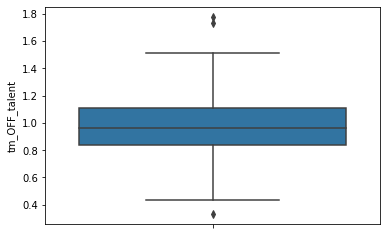

In [13]:
snd.boxplot(y='tm_OFF_talent',data=data_new)

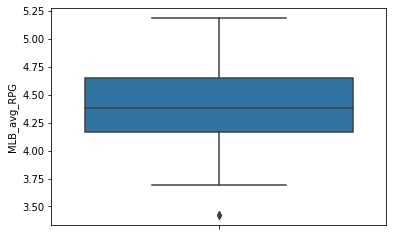

In [14]:
snd.boxplot(y='MLB_avg_RPG',data=data_new)

In [15]:
data_new['tm_OFF_talent'].describe()

count    172.000000
mean       0.980740
std        0.229886
min        0.329207
25%        0.837329
50%        0.961385
75%        1.112122
max        1.778661
Name: tm_OFF_talent, dtype: float64

In [16]:
q1 = data_new['tm_OFF_talent'].quantile(0.25)
q3 = data_new['tm_OFF_talent'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range


In [17]:
low,high

(0.42514069212499994, 1.5243104991249998)

# Winzorizing tech

In [18]:
data_new['tm_OFF_talent']=np.where (data_new['tm_OFF_talent']>high,high,data_new['tm_OFF_talent'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
data_new['tm_OFF_talent']=np.where (data_new['tm_OFF_talent']<low,low,data_new['tm_OFF_talent'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


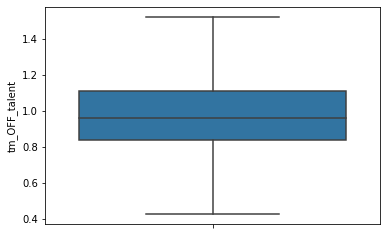

In [20]:
snd.boxplot(y='tm_OFF_talent',data=data_new)

In [21]:
data_new

,tm_OFF_talent,MLB_avg_RPG
0,1.332265,3.99
1,1.049056,4.41
2,1.524310,4.91
3,1.472107,4.49
4,1.356557,4.68
...,...,...
167,0.565687,3.91
168,0.597254,4.33
169,0.538848,4.58
170,0.628671,4.31


In [22]:
q11 = data_new['MLB_avg_RPG'].quantile(0.25)
q33 = data_new['MLB_avg_RPG'].quantile(0.75)
iqr = q33-q11 #Interquartile range
low1  = q11-1.5*iqr #acceptable range
high1 = q33+1.5*iqr #acceptable range

In [23]:
low1,high1

(3.4499999999999993, 5.370000000000001)

In [24]:
data_new['MLB_avg_RPG'].describe()

count    172.000000
mean       4.414535
std        0.346091
min        3.420000
25%        4.170000
50%        4.380000
75%        4.650000
max        5.190000
Name: MLB_avg_RPG, dtype: float64

In [25]:
data_new['MLB_avg_RPG']=np.where (data_new['MLB_avg_RPG']>high1,high1,data_new['MLB_avg_RPG'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
data_new['MLB_avg_RPG']=np.where (data_new['MLB_avg_RPG']<low1,low1,data_new['MLB_avg_RPG'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


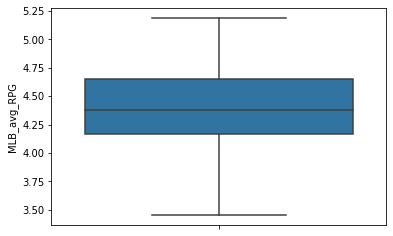

In [27]:
snd.boxplot(y='MLB_avg_RPG',data=data_new)

# CORRELATION MATRIX 

In [28]:
new_corr=data_new.corr()

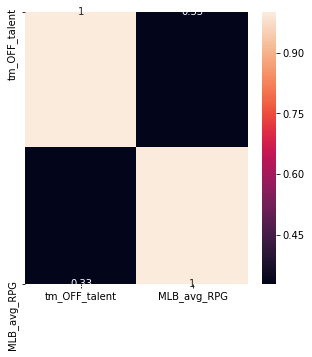

In [29]:
f, ax = plt.subplots(figsize=(5, 5))
snd.heatmap(new_corr,annot=True)

# DATA PARTITION

In [30]:
train_X=data_new[['tm_OFF_talent']]

In [31]:
train_Y=data_new[['MLB_avg_RPG']]

In [32]:
X_train, X_test, y_train, y_test =train_test_split(train_X,
                    train_Y,test_size=0.3,random_state=231)

In [33]:
X_train.shape

(120, 1)

In [34]:
X_test.shape

(52, 1)

# MODEL BUILDING 

In [39]:
trained_data=pd.concat([X_train,y_train],axis=1)

In [40]:
trained_data

,tm_OFF_talent,MLB_avg_RPG
130,1.191538,4.31
153,0.772858,4.38
146,0.813652,4.46
43,0.909911,3.99
3,1.472107,4.49
...,...,...
119,0.828100,3.89
2,1.524310,4.91
11,1.120247,4.08
148,0.721370,4.38


# USING LINEAR REGRESSION FUNCTIOON 

In [51]:
slr=LinearRegression()
slr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# MODEL EVALUATION 

In [56]:
slr.intercept_

array([3.84080991])

In [68]:
coeff_df = pd.DataFrame(slr.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
tm_OFF_talent,0.563544


# using STATSMODEL

In [63]:
X_train_const=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_const).fit()

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MLB_avg_RPG   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     16.01
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           0.000110
Time:                        12:59:40   Log-Likelihood:                -39.077
No. Observations:                 120   AIC:                             82.15
Df Residuals:                     118   BIC:                             87.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8408      0.140     27.407      0.000       3.563       4.118
tm_OFF_talent     0.5635      0.141      4.002      0.000       0.285       0.842
==============================================================================
Omnibus:                        0.548   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.215
Skew:                          -0.051   Prob(JB):                        0.898
Kurtosis:                       3.181   Cond. No.                         8.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
Y_prdict=model.predict(X_train_const)

In [111]:
trained_data=pd.concat([X_train,y_train],axis=1)

In [112]:
trained_data['Predicted']=Y_prdict

In [113]:
trained_data.head()

,tm_OFF_talent,MLB_avg_RPG,Predicted
130,1.191538,4.31,4.512294
153,0.772858,4.38,4.276349
146,0.813652,4.46,4.299338
43,0.909911,3.99,4.353584
3,1.472107,4.49,4.670406


In [114]:
model_mse = mean_squared_error(trained_data["MLB_avg_RPG"], trained_data['Predicted'])

In [115]:
model_mse = mean_squared_error(trained_data["MLB_avg_RPG"], trained_data['Predicted'])
print(model_mse)

0.11229799008635745


In [116]:
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
print(model_rmse)

0.3351089227196994


# Linearity

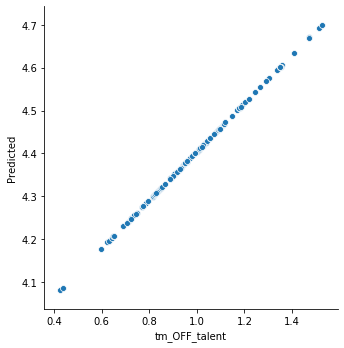

In [166]:
p=snd.pairplot(trained_data,x_vars=['tm_OFF_talent'], y_vars='Predicted',
                 size=5)

In [133]:
residual=model.resid

In [136]:
residual

130   -0.202294
153    0.103651
146    0.160662
43    -0.363584
3     -0.180406
         ...   
119   -0.417481
2      0.210175
11    -0.392118
148    0.132667
87    -0.235422
Length: 120, dtype: float64

In [140]:
trained_data['Residual']=residual

In [141]:
trained_data

,tm_OFF_talent,MLB_avg_RPG,Predicted,Residual
130,1.191538,4.31,4.512294,-0.202294
153,0.772858,4.38,4.276349,0.103651
146,0.813652,4.46,4.299338,0.160662
43,0.909911,3.99,4.353584,-0.363584
3,1.472107,4.49,4.670406,-0.180406
...,...,...,...,...
119,0.828100,3.89,4.307481,-0.417481
2,1.524310,4.91,4.699825,0.210175
11,1.120247,4.08,4.472118,-0.392118
148,0.721370,4.38,4.247333,0.132667


# Homoscedasicity ( Constant Variance )

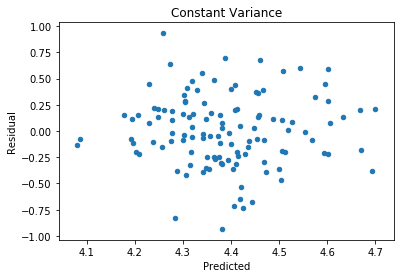

In [142]:
trained_data.plot.scatter(x='Predicted',y='Residual',title='Constant Variance')

# normality

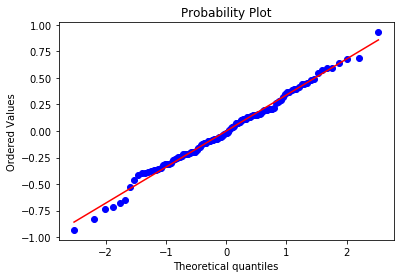

In [143]:
import scipy.stats as stats

stats.probplot(trained_data['Residual'], dist="norm", plot=plt)
plt.show()

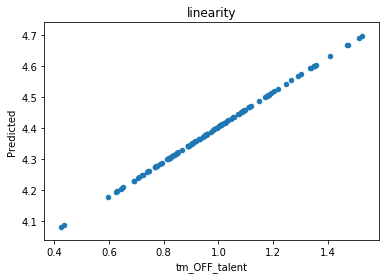

In [154]:
trained_data.plot.scatter(x='tm_OFF_talent', y='Predicted', 
                  title='linearity')